# Getting started
- docs: https://platform.openai.com/docs/guides/fine-tuning
- <a href="https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset">prepare</a> data in <a href="https://jsonlines.org/">jsonl</a> format

### Example
```json
{"prompt": "<prompt text>", "completion": "<ideal generated text>"}
{"prompt": "<prompt text>", "completion": "<ideal generated text>"}
{"prompt": "<prompt text>", "completion": "<ideal generated text>"}
...
```

- example notebooks: https://platform.openai.com/docs/guides/fine-tuning/example-notebooks


### Data
- NER datasets: https://github.com/juand-r/entity-recognition-datasets
    - HIPE-2022: https://github.com/hipe-eval/HIPE-2022-data
        - AjMC: https://mromanello.github.io/ajax-multi-commentary/

In [17]:
import os, time
import openai
import pandas as pd

openai_api_key = os.environ.get('OPENAI_API_KEY')

In [ ]:
os.listdir()

# Prepare data tool

In [4]:
!openai tools fine_tunes.prepare_data -f ner_ajmc_dev_en.jsonl -q

Analyzing...

- Your file contains 251 prompt-completion pairs
- `completion` column/key should not contain empty strings. These are rows: [1, 2, 5, 7, 10, 11, 12, 13, 16, 17, 21, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 36, 39, 40, 41, 45, 46, 47, 48, 49, 50, 51, 52, 56, 58, 60, 62, 63, 65, 67, 68, 69, 70, 71, 72, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 89, 90, 92, 93, 94, 95, 96, 98, 99, 101, 104, 107, 108, 110, 112, 113, 115, 117, 118, 121, 122, 124, 126, 127, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 146, 147, 148, 152, 153, 155, 156, 157, 158, 159, 160, 161, 163, 166, 169, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 189, 191, 192, 193, 194, 195, 197, 199, 200, 202, 204, 206, 215, 223, 226, 234, 236, 240, 243, 245, 248, 249, 250]
- Your data does not contain a common separator at the end of your prompts. Having a separator string appended to the end of the prompt makes it clearer to the fine-tuned model where the completion should begin. See https:/

In [23]:
with open('ner_ajmc_dev_en_prepared.jsonl') as file:
    lines = [line.rstrip() for line in file]

In [25]:
print(len(lines))

110


# Fine tuning
- Notes: 
    - default model was curie when this was ran
    - cheapest model is ada
- can specify model with ```-m``` 
    - e.g. ```-m ada```

In [5]:
!openai api fine_tunes.create -t "ner_ajmc_dev_en_prepared.jsonl"

Upload progress: 100%|████████████████████| 26.0k/26.0k [00:00<00:00, 12.5Mit/s]
Uploaded file from ner_ajmc_dev_en_prepared.jsonl: file-2QeDNcrGWc0F0D4FZcNh6efm
Created fine-tune: ft-xTOQjPnjXOpryP0m3NOdTAm3
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-03-30 15:31:22] Created fine-tune: ft-xTOQjPnjXOpryP0m3NOdTAm3

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-xTOQjPnjXOpryP0m3NOdTAm3



In [10]:
!openai api fine_tunes.follow -i ft-xTOQjPnjXOpryP0m3NOdTAm3

[2023-03-30 15:31:22] Created fine-tune: ft-xTOQjPnjXOpryP0m3NOdTAm3
[2023-03-30 15:34:26] Fine-tune costs $0.12
[2023-03-30 15:34:26] Fine-tune enqueued. Queue number: 0
[2023-03-30 15:34:28] Fine-tune started
[2023-03-30 15:35:51] Completed epoch 1/4
[2023-03-30 15:36:10] Completed epoch 2/4
[2023-03-30 15:36:30] Completed epoch 3/4
[2023-03-30 15:36:49] Completed epoch 4/4
[2023-03-30 15:37:11] Uploaded model: curie:ft-personal-2023-03-30-22-37-10
[2023-03-30 15:37:11] Uploaded result file: file-XYHSAnr7sk5cYKHfqhsM3hXz
[2023-03-30 15:37:11] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m curie:ft-personal-2023-03-30-22-37-10 -p <YOUR_PROMPT>


In [15]:
!openai api fine_tunes.results -i ft-xTOQjPnjXOpryP0m3NOdTAm3 > result.csv

# Results of fine tuning

In [18]:
df_results = pd.read_csv('result.csv')
df_results.head()

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy
0,1,49,1,0.567610,0.0,0.428571
1,2,178,2,0.510507,0.0,0.611111
2,3,283,3,0.706393,0.0,0.312500
3,4,372,4,0.524451,0.0,0.333333
4,5,493,5,0.898045,0.0,0.622222


In [26]:
df_results.tail()

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy
436,437,41981,437,0.043954,1.0,1.0
437,438,42046,438,0.016952,1.0,1.0
438,439,42215,439,0.038740,1.0,1.0
439,440,42296,440,0.034308,1.0,1.0
440,441,42345,441,0.020414,1.0,1.0


<AxesSubplot: >

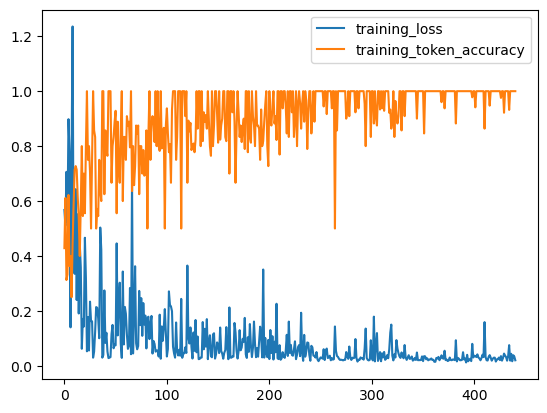

In [20]:
df_results[['training_loss', 'training_token_accuracy']].plot()

# Sample

In [12]:
model_id = 'curie:ft-personal-2023-03-30-22-37-10'
prompt = '128. adrés ] Odysseus is warmed not to do as Ajax had done. Cp. infr. 773.' + '->'
# expected ['pers: Odysseus', 'pers: Ajax']

res = openai.Completion.create(model=model_id, 
                               prompt=prompt, 
                               temperature=0)
res

<OpenAIObject text_completion id=cmpl-6zvDh1sXTs83bxGj4nFbZlpzTETZe at 0x103ba7510> JSON: {
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "text": " pers: Odysseus, pers: Ajax\n\nscope: 773"
    }
  ],
  "created": 1680215981,
  "id": "cmpl-6zvDh1sXTs83bxGj4nFbZlpzTETZe",
  "model": "curie:ft-personal-2023-03-30-22-37-10",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 16,
    "prompt_tokens": 30,
    "total_tokens": 46
  }
}

In [21]:
model_id = 'curie:ft-personal-2023-03-30-22-37-10'
prompt = 'τοῦ pakpod. . βίου ] Thearticleis added as with words of number or quantity. Cp. O. T. 318, βίου τοῦ μακραίωνος, and for the sentiment, Fr. 867, ὅστις γὰρ ἐν κακοῖσιν ἱμείρει βίον, | ἢ δειλός ἐστιν ἢ δυσάλγητος φρένας : Plato, Phaedo 117 A, γέλωτα ὀφλήσειν παρ᾽ ἐμαυτῷ, γλιχόμενος τοῦ ζῆν καὶ φειδόμενος, οὐδενὸς ἔτι ἐνόντος,' + '->'
# expected ['work: O. T.', 'scope: 318', 'scope: Fr. 867', 'pers: Plato', 'work: Phaedo']

start_time = time.time()
res = openai.Completion.create(model=model_id, 
                               prompt=prompt, 
                               temperature=0)
print(f'finished after {time.time() - start_time}')
res

finished after 0.504047155380249


<OpenAIObject text_completion id=cmpl-6zvMBmqiVx8ZwYl0aZOHYIGuvajXJ at 0x108b718a0> JSON: {
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "text": " work: O. T., scope: 318, scope: Fr. 867"
    }
  ],
  "created": 1680216507,
  "id": "cmpl-6zvMBmqiVx8ZwYl0aZOHYIGuvajXJ",
  "model": "curie:ft-personal-2023-03-30-22-37-10",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 16,
    "prompt_tokens": 277,
    "total_tokens": 293
  }
}

# Checking and deleting existing fine tuned models

In [ ]:
!openai api fine_tunes.list

In [28]:
openai.Model.delete('curie:ft-personal-2023-03-30-22-37-10')

<Model model id=curie:ft-personal-2023-03-30-22-37-10 at 0x11df325c0> JSON: {
  "deleted": true,
  "id": "curie:ft-personal-2023-03-30-22-37-10",
  "object": "model"
}

# Cost and Usage
- close to \$0.13 for this model for training and two requests

### Cost per <a href="https://openai.com/pricing#language-models:~:text=/%201K%20tokens-,Fine%2Dtuning%20models,-Create%20your%20own">documentation</a>
<blockquote>
Create your own custom models by fine-tuning our base models with your training data. Once you fine-tune a model, you’ll be billed only for the tokens you use in requests to that model.
</blockquote>

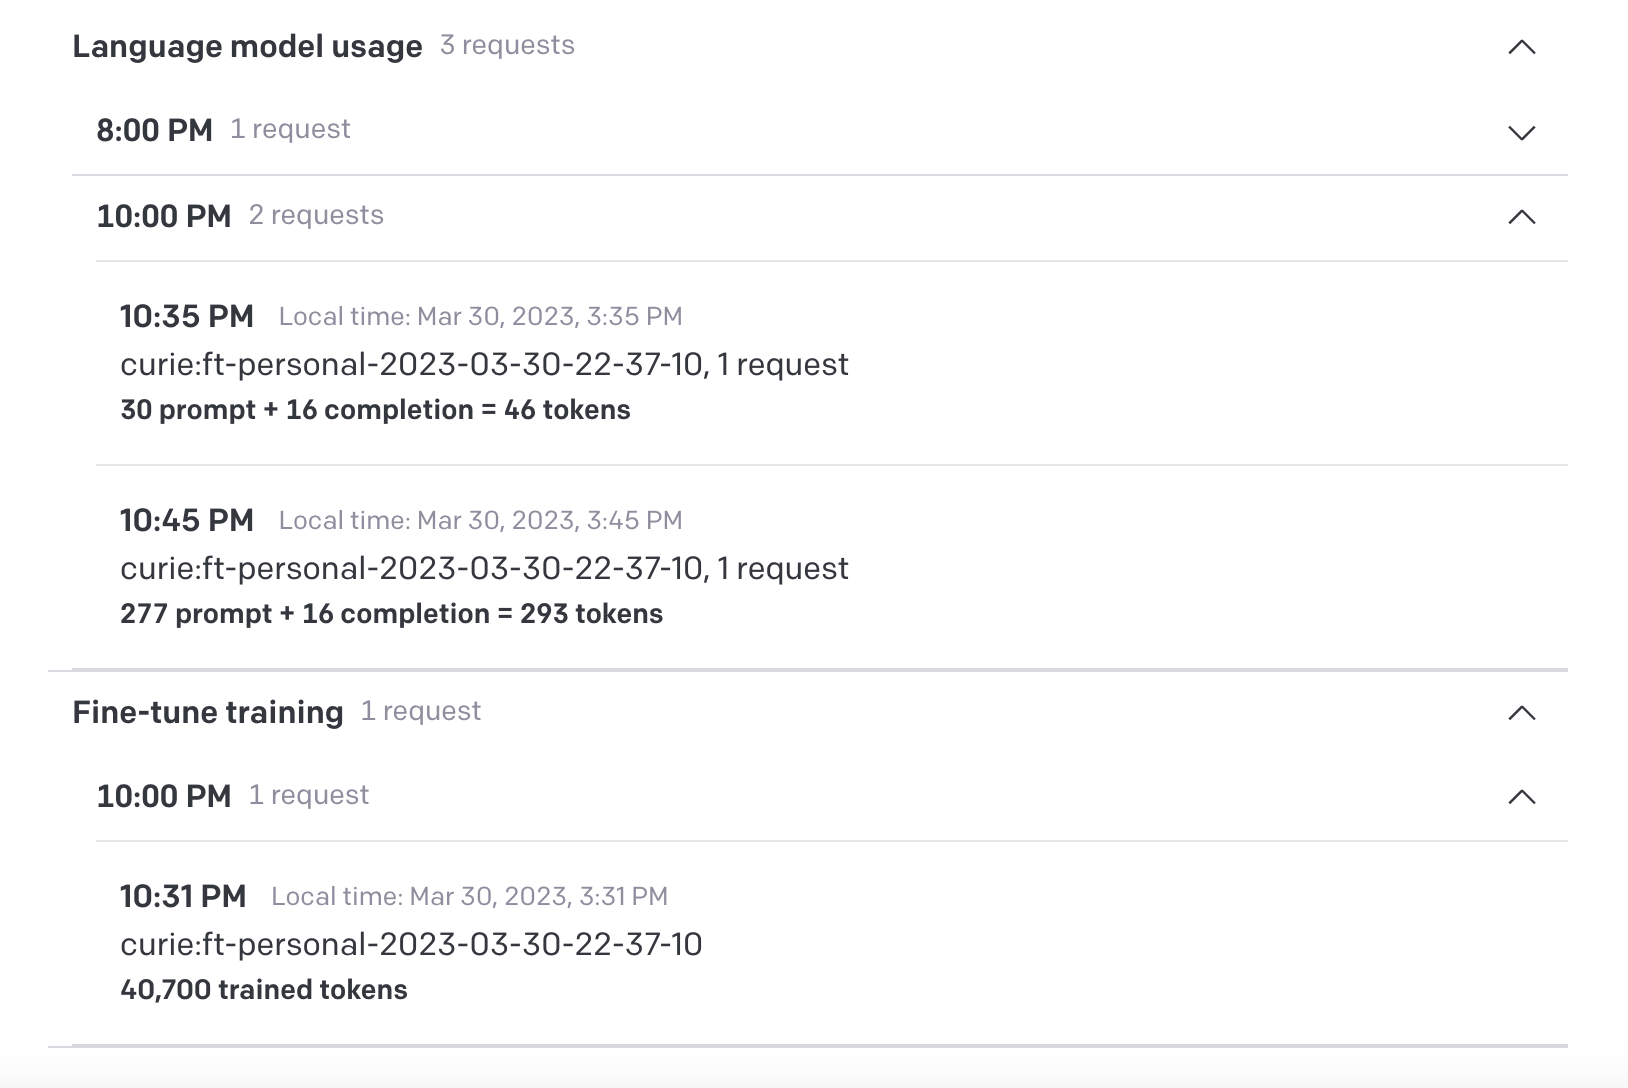

### Pricing (as of 2022/03/30)
- https://openai.com/pricing#language-models
- usage costs fairly high, e.g., compared with Chat -> gpt-3.5-turbo (Usage: \$0.002 / 1K tokens)

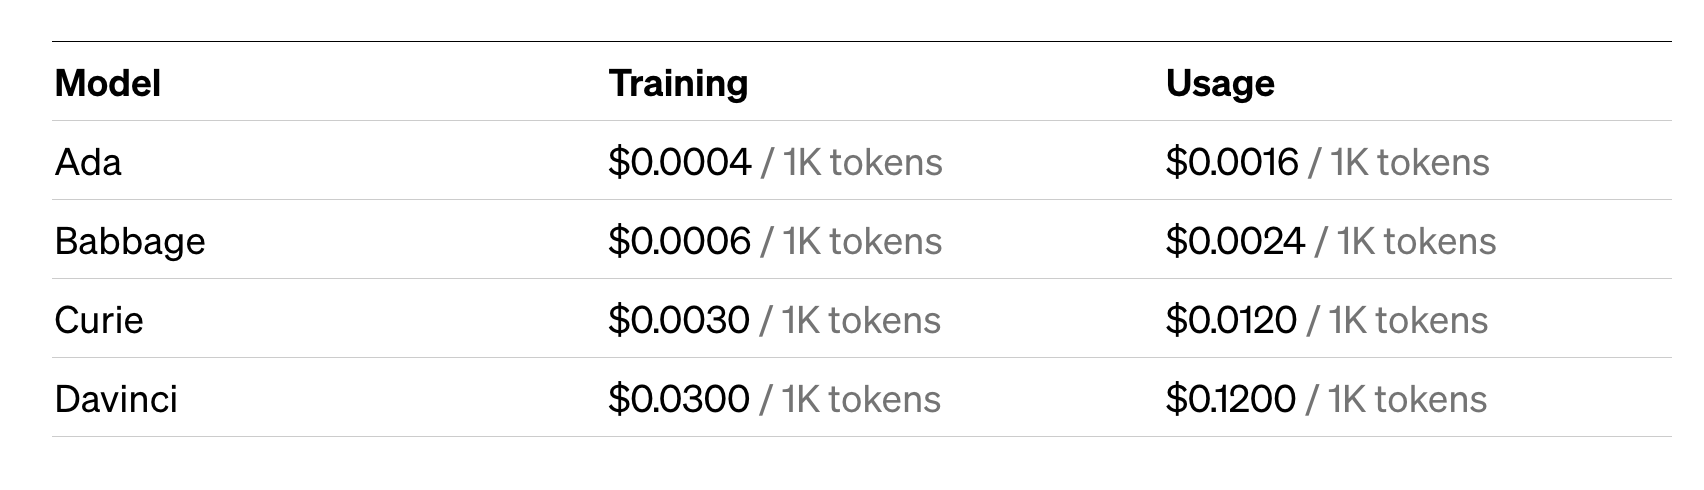